In [1]:
%matplotlib inline

import sys
import pandas as pd
import datacube
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

sys.path.append("../Scripts")
from datacube.helpers import write_geotiff
from dea_datahandling import load_ard
from dea_datahandling import mostcommon_crs
from dea_plotting import display_map
from dea_plotting import rgb
from dea_bandindices import calculate_indices


In [2]:
dc = datacube.Datacube(app='Alberts Forest')

In [11]:
location = 'Canberra'

# Set the central latitude and longitude
central_lat = -35.84
central_lon = 145.22

# Set the buffer to load around the central coordinates
buffer = 0.1

# Compute the bounding box for the study area
lats = (central_lat - buffer, central_lat + buffer)
lons = (central_lon - buffer, central_lon + buffer)

display_map(x=lons, y=lats, margin=-0.2)

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [4]:
# list(dc.list_products()['name'])

In [12]:
# Create a reusable query
query = {
    'x': lons,
    'y': lats,
    'time': ('2018-01-01', '2018-03-30'),
    'measurements': ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1','nbart_swir_2'],
    'output_crs': 'EPSG:3577',
    'resolution': (-30, 30),
    'group_by': 'solar_day'
}

# Load available data from Landsat 8 and filter to retain only times
# with at least 99% good data
ds = load_ard(dc=dc, products=['ga_ls8c_ard_3'], min_gooddata=0.5, **query)

Loading ga_ls8c_ard_3 data
    Filtering to 5 out of 11 observations
    Applying pixel quality/cloud mask
    Applying invalid data mask
    Applying contiguity mask
Combining and sorting data
    Returning 5 observations 


In [13]:
ds

<xarray.Dataset>
Dimensions:       (time: 5, x: 676, y: 799)
Coordinates:
  * x             (x) float64 1.182e+06 1.182e+06 ... 1.202e+06 1.202e+06
  * y             (y) float64 -3.965e+06 -3.965e+06 ... -3.989e+06 -3.989e+06
  * time          (time) datetime64[ns] 2018-01-16T00:09:16.940377 ... 2018-03-21T00:08:45.937021
Data variables:
    nbart_blue    (time, y, x) float32 283.0 411.0 198.0 ... 690.0 732.0 756.0
    nbart_green   (time, y, x) float32 510.0 596.0 383.0 ... 969.0 997.0 1028.0
    nbart_red     (time, y, x) float32 582.0 763.0 423.0 ... 1321.0 1383.0
    nbart_nir     (time, y, x) float32 2522.0 2564.0 1987.0 ... 2281.0 2331.0
    nbart_swir_1  (time, y, x) float32 1762.0 2161.0 1391.0 ... 3757.0 3841.0
    nbart_swir_2  (time, y, x) float32 912.0 1319.0 731.0 ... 2659.0 2798.0
Attributes:
    crs:      EPSG:3577

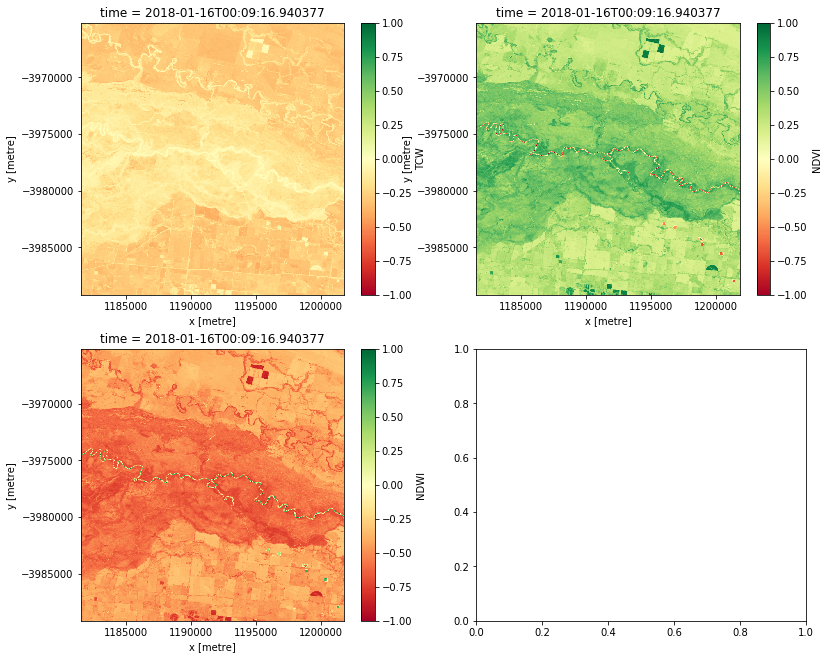

In [25]:
# Calculate NDVI using `calculate indices`
ds_tcw = calculate_indices(ds, index='TCW', collection='ga_ls_3')
ds_ndvi = calculate_indices(ds, index='NDVI', collection='ga_ls_3')
ds_ndwi = calculate_indices(ds, index='NDWI', collection='ga_ls_3')

# Set up subplots
f, axarr = plt.subplots(2, 2, figsize=(13, 11))

ds_tcw.TCW.isel(time=0).plot(vmin=-1, vmax=1, cmap='RdYlGn', ax=axarr[0, 0])
ds_ndvi.NDVI.isel(time=0).plot(vmin=-1, vmax=1, cmap='RdYlGn', ax=axarr[0, 1])
ds_ndwi.NDWI.isel(time=0).plot(vmin=-1, vmax=1, cmap='RdYlGn', ax=axarr[1, 0])